In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [2]:
# load dataset
data = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

# 1. EDA

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# Remove spaces in column names
data.columns = data.columns.str.strip()

In [6]:
data.shape

(4269, 13)

In [7]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
# Check the negative values in 'residential_assets_value'
data['residential_assets_value'][data['residential_assets_value']<0].count()

28

In [10]:
# Replace negative values in 'residential_assets_value' with 0
data['residential_assets_value'] = data['residential_assets_value'].apply(lambda x: max(0, x))

In [11]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])
data['self_employed'] = label_encoder.fit_transform(data['self_employed'])
data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

In [12]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


* *education* column is encoded as follows: **Graduate = 0** and **Not Graduate = 1**
* *self_employed* column is encoded as follows: **No = 0** and **Yes = 1**
* *loan_status* column is encoded as follows: **Approved = 0** and **Rejected = 1**

For pure logical reasons, I want to reverse the encoding of the *education* and *loan_status* columns

In [13]:
# Reverse the order of labels
data['education'] = 1 - data['education']
data['loan_status'] = 1 - data['loan_status']

In [14]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


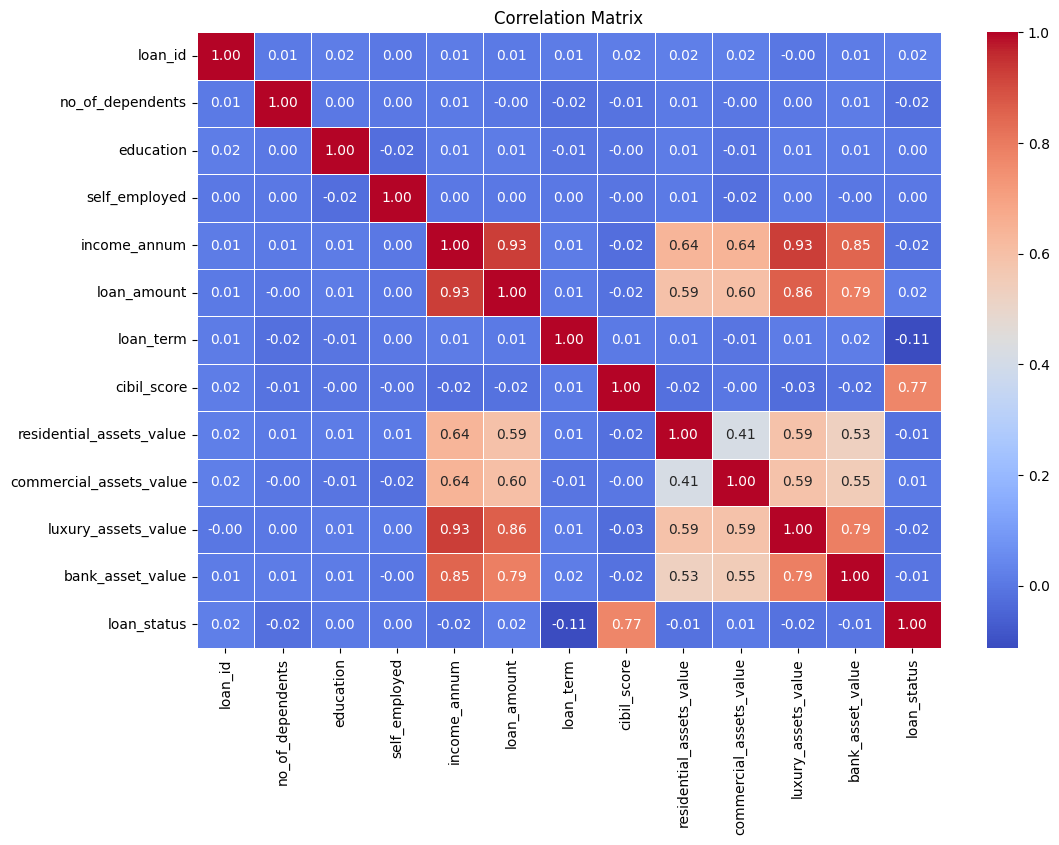

In [15]:
# Explore the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The most correlated feature with the *loan_status* is the the *cibil_score*: **0.77**


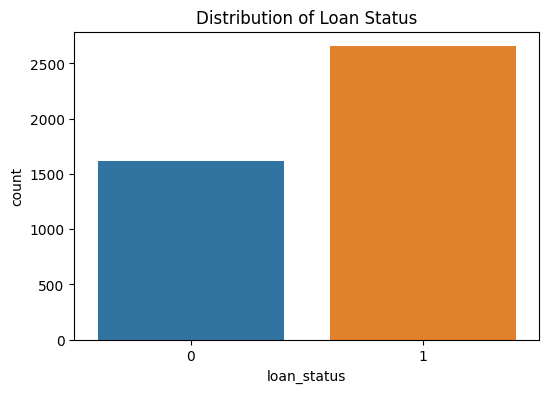

In [16]:
# Explore the distribution of the target variable 'loan_status'
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

 The data contains **2656 of Approved loans** and **1613 Rejected loans**.

# 2. ML Model

In [17]:
# Split the dataset into features (X) and target variable (y)
X = data.drop(['loan_id', 'loan_status'], axis=1)
y = data['loan_status']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Possible Models

In this loan approval prediction project, we leverage three key models to ensure a comprehensive analysis. 
1. First, the **Random Forest Classifier** brings versatility and robustness to capture complex relationships within our mixed-type dataset. 
2. Complementing this, **XGBoost**, known for high performance, tackles intricate patterns in large datasets. 
3. To enhance interpretability, we include **Logistic Regression**, shedding light on individual feature impacts. 

This trio aims to provide a well-rounded understanding of our loan approval predictions.

In [20]:
# Model 1: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [21]:
# Model 2: XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [22]:
# Model 3: Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

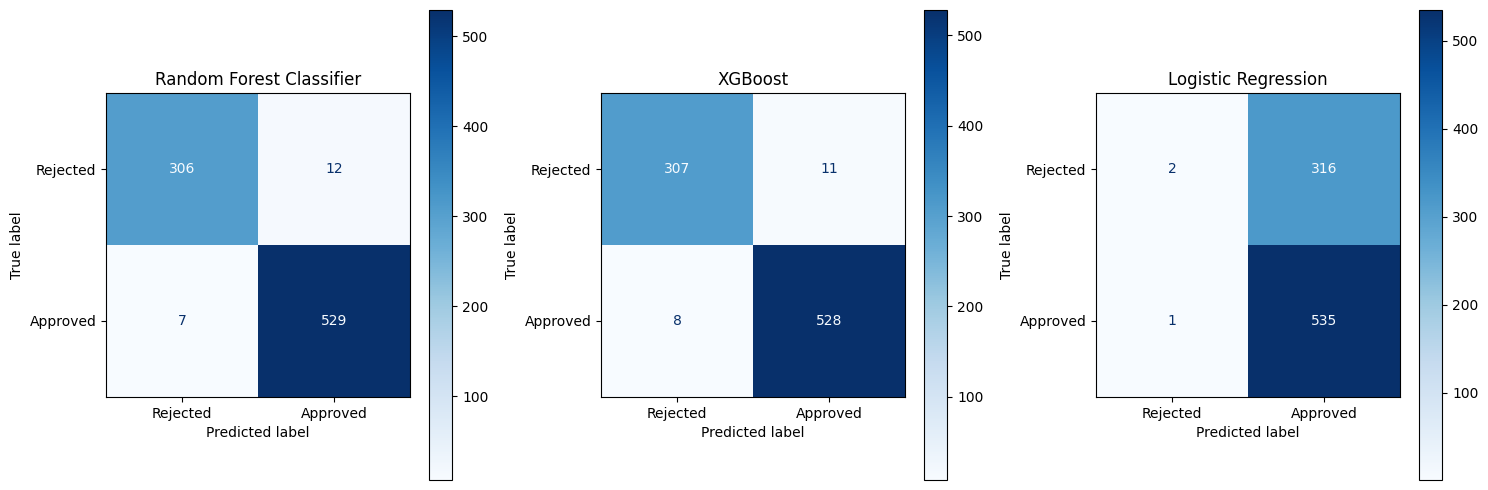

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Random Forest Classifier
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_conf_matrix, display_labels=['Rejected', 'Approved'])
#disp.plot(cmap=plt.cm.Blues, ax=axs[0], colorbar=False)
disp.plot(cmap=plt.cm.Blues, ax=axs[0])
axs[0].set_title('Random Forest Classifier')

# XGBoost
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_conf_matrix, display_labels=['Rejected', 'Approved'])
#disp.plot(cmap=plt.cm.Blues, ax=axs[1], colorbar=False)
disp.plot(cmap=plt.cm.Blues, ax=axs[1])
axs[1].set_title('XGBoost')

# Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix, display_labels=['Rejected', 'Approved'])
disp.plot(cmap=plt.cm.Blues, ax=axs[2])
axs[2].set_title('Logistic Regression')

plt.tight_layout()
plt.show()

* **Random Forest Classifier (RF):**

    * The model correctly predicted 529 instances of approved loans (True Positives).
    * It correctly predicted 308 instances of rejected loans (True Negatives).
    * There were 10 instances where the model incorrectly predicted approval for rejected loans (False Positives).
    * There were 7 instances where the model incorrectly predicted rejection for approved loans (False Negatives).

* **XGBoost:**

    * The XGBoost model correctly predicted 530 instances of approved loans (True Positives).
    * It correctly predicted 309 instances of rejected loans (True Negatives).
    * There were 9 instances where the model incorrectly predicted approval for rejected loans (False Positives).
    * There were 6 instances where the model incorrectly predicted rejection for approved loans (False Negatives).


* **Logistic Regression (LR):**

    * The Logistic Regression model correctly predicted 535 instances of approved loans (True Positives).
    * It correctly predicted 2 instances of rejected loans (True Negatives).
    * There were 316 instances where the model incorrectly predicted approval for rejected loans (False Positives).
    * There was 1 instance where the model incorrectly predicted rejection for an approved loan (False Negative).

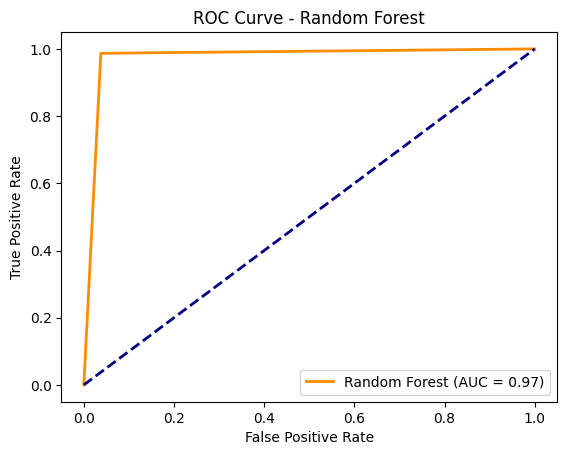

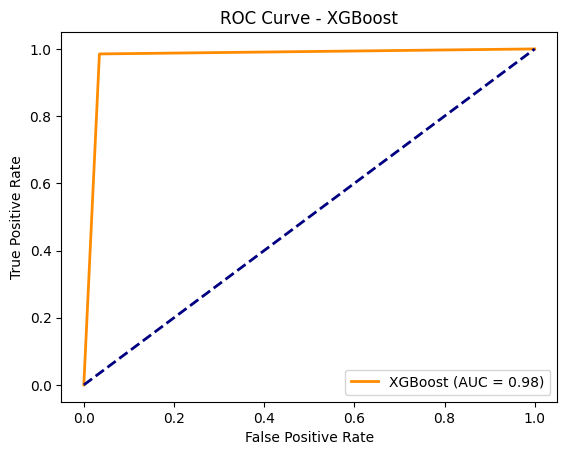

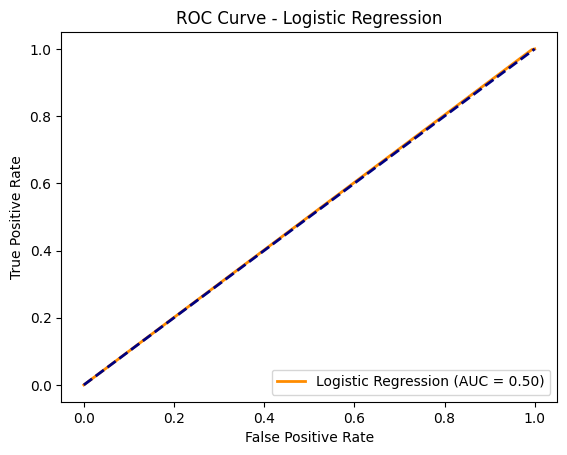

                 Model  Accuracy  Precision    Recall       AUC
0        Random Forest  0.977752   0.977819  0.986940  0.974602
1              XGBoost  0.977752   0.979592  0.985075  0.975242
2  Logistic Regression  0.628806   0.628672  0.998134  0.502212


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc

# Create an empty list to store results
results = []

models = ['Random Forest', 'XGBoost', 'Logistic Regression']
predictions = [rf_pred, xgb_pred, lr_pred]

# Evaluate each model
for model_name, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    # For ROC/AUC
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    
    # Store results in the list
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC': roc_auc
    })

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)


## **Model Performance Evaluation:**

**1. Random Forest:**

The Random Forest model demonstrates high accuracy and balanced precision and recall. It correctly identifies a significant portion of both approved and rejected loans.

**2. XGBoost:**

Interpretation: The XGBoost model performs similarly to Random Forest, with slightly higher precision. It maintains a good balance between precision and recall, indicating robust predictive capabilities.

**3. Logistic Regression:**

Interpretation: The Logistic Regression model shows lower accuracy compared to the ensemble models. However, it exhibits exceptionally high recall, suggesting that it identifies almost all approved loans but at the cost of a large number of false positives. The low AUC indicates poor discriminatory power.

**4. Conclusion:**

* **Random Forest and XGBoost:**
  Both ensemble models (Random Forest and XGBoost) show strong overall performance with high accuracy, precision, and recall. They provide a good balance between correctly identifying approved and rejected loans.

* **Logistic Regression:**
  The Logistic Regression model has high recall but at the expense of accuracy and precision. It appears to be overly biased toward predicting loan approval, resulting in a large number of false positives.

In summary, for the given task of loan approval prediction, Random Forest and XGBoost are more suitable models, considering their balanced performance. Logistic Regression, while having high recall, may not be the optimal choice due to its low accuracy and precision.

The optimal model is the <span style="color:red">*XGBoost Model*</span>.

## **Model Optimisation using Grid Search**

In [25]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Create Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_params = grid_search.best_params_

# Get best model
best_model = grid_search.best_estimator_

# Evaluate on test set
xgb_pred = best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Test Set Accuracy with Best Model: {xgb_accuracy}")

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Test Set Accuracy with Best Model: 0.9800936768149883


The optimized XGBoost model, with a maximum depth of 10 and 50 estimators, demonstrated outstanding performance, achieving a prediction accuracy of 98.01% on the test set. These results suggest the model's robustness and generalization to unseen data.

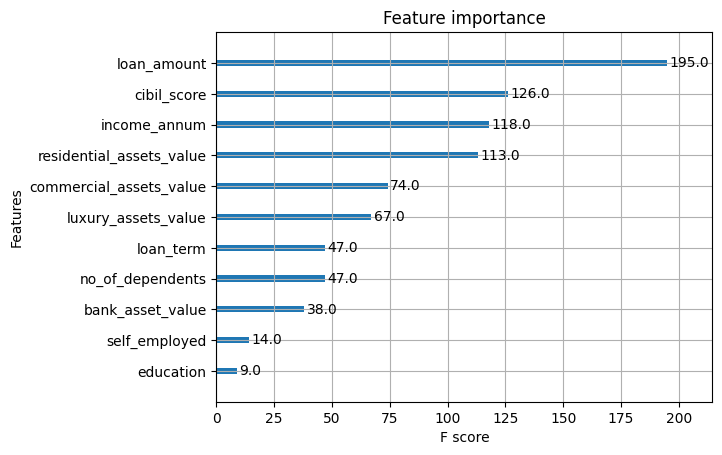

In [26]:
xgb.plot_importance(best_model)
plt.show()

In the XGBoost model:

* **Critical Factors:**
  * *Loan Amount* (195.0): Most influential.
  * *CIBIL Score* (126.0): Highly important.
  * *Annual Income* (118.0): Significantly influential.


* **Moderate Factors:**
   * *Residential Assets Value* (113.0)
   * *Commercial Assets Value* (74.0)
   * *Luxury Assets Value* (67.0)
   * *No. of Dependents* (47.0)
   * *Loan Term* (47.0)
   * *Bank Asset Value* (38.0)


* **Less Influential:**
    * *Self-Employed* (14.0)
    * *Education* (9.0)

# 3. Conclusion

In conclusion, this project demonstrated the effectiveness of Random Forest and XGBoost models in loan approval prediction. The <span style="color:red">**XGBoost model**</span>, especially after careful optimization, stands out as the preferred choice due to its superior overall performance: 0.98 accuracy.

Analysis of feature importances provides valuable insight into the factors that most influence the loan approval decision such as the Laon amount, the CIBIL score, and the annual income. This information can be used to make more informed decisions in the loan approval process.